In [1]:
#! pip install --upgrade matplotlib
#! pip install vaderSentiment
#! pip install scikit-plot
#! pip install wordcloud

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import nltk
import scipy
nltk.download('wordnet')
import sklearn
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px
import copy 
import seaborn as sns
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import scikitplot as skplt
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
#import lightgbm as lgb

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\96650\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv',index_col=0)
df

Clothing ID  Age                                              Title  \
0              767   33                                                NaN   
1             1080   34                                                NaN   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 10 columns]

In [6]:
df.shape

(23486, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [8]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [11]:
df.rename(columns={
    
    'Clothing ID' : 'Clothing_ID',
    'Review Text' : 'Review_Text',
    'Recommended IND' : 'Recommended',
    'Positive Feedback Count' : 'Positive_Feedback_Count',
    'Division Name' : 'Division_Name',
    'Department Name' : 'Department_Name',
    'Class Name' : 'Class_Name',    
},inplace=True)

In [12]:
data = df[['Title','Review_Text','Recommended']]

In [13]:
data

Title  \
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
5                                Not for the very petite   
6                                   Cagrcoal shimmer fun   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                             Review_Text  Recommended  
2      I had such high hopes for this dress and reall...            0  
3      I love, love, love this jumpsuit. it's fun, fl...            1  
4      This shirt is very flattering to all due to th...            1  
5      I love tracy reese dresses, but this one is no...            0  
6      I aded this in my basket at hte last mintue to...            1  
...                                                  ...          ...  
23481  I was very happy to snag this dress at such a ...            1  
23482  It reminds me of maternity clothes. soft, stre...            1  
23483  This fit well, but the top was very see throug...            0  
23484  I bought this dress for a wedding i have this ...            1  
23485  This dress in a lovely platinum is feminine an...            1  

[19662 rows x 3 columns]

In [14]:
data['Review'] = data['Title'] + ' ' + data['Review_Text']

In [15]:
data = data.drop(labels=['Title','Review_Text'] , axis=1)
data.head()

Recommended                                             Review
2            0  Some major design flaws I had such high hopes ...
3            1  My favorite buy! I love, love, love this jumps...
4            1  Flattering shirt This shirt is very flattering...
5            0  Not for the very petite I love tracy reese dre...
6            1  Cagrcoal shimmer fun I aded this in my basket ...

In [16]:
#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)
#using only v1 and v2 column
#expanding the dispay of text sms column

data.head()

Recommended  \
2  0             
3  1             
4  1             
5  0             
6  1             

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Review  
2  Some major design flaws I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c  
3  My favorite buy! I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!                                                                                                                                                                                                                                                                                                                                                                                                 
4  Flattering shirt This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!                                                                                                                                                                                                                                                                                                                             
5  Not for the very petite I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.              
6  Cagrcoal shimmer fun I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.

**Top Frequent 200 Words in the Dataset (Before Cleaning)**

In [17]:
FreqOfWords = data['Review'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (Before Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

In [18]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('wordnet')
nltk.download('stopwords')

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    # stem_words=[stemmer.stem(w) for w in filtered_words]
    # lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


data['Review']=data['Review'].map(lambda s:preprocess(s))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\96650\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\96650\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
  return " ".join([lemmatizer.lemmatize(word,'v') for word in text.split()])
data['Review'] = data['Review'].apply(lambda text: lemmatize_words(text))
data

Recommended  \
2      0             
3      1             
4      1             
5      0             
6      1             
...   ..             
23481  1             
23482  1             
23483  0             
23484  1             
23485  1             

                                                                                                                                                                                                                                                                                                                  Review  
2      major design flaw high hop dress really want work initially order petite small usual size find outrageously small small fact could zip reorder petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sew directly zipper  
3      favorite buy love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment                                                                                                                                                                                                              
4      flatter shirt shirt flatter due adjustable front tie perfect length wear leggings sleeveless pair well cardigan love shirt                                                                                                                                                                                         
5      petite love tracy reese dress one petite feet tall usually wear brand dress pretty package lot dress skirt long full overwhelm small frame stranger alterations shorten narrow skirt would take away embellishment garment love color idea style work return dress                                                 
6      cagrcoal shimmer fun aded basket hte last mintue see would look like person store pick go teh darkler color pale hte color really gorgeous turn mathced everythiing try prefectly little baggy hte hte msallet size bummer petite decide jkeep though say matvehd everything ejans pant skirt waas try keep oops   
...                                                                                                                                                                                                                                                                                                                 ...   
23481  great dress many occasion happy snag dress great price easy slip flatter cut color combo                                                                                                                                                                                                                           
23482  wish make cotton remind maternity clothe soft stretchy shiny material cut flatter drape nicely find one button close front look awkward nice long sleeves maybe others                                                                                                                                             
23483  cute see fit well top see never would work glad able try store order online different fabric would great                                                                                                                                                                                                           
23484  cute dress perfect summer party buy dress wed summer cute unfortunately fit perfect medium fit waist perfectly way long big bust shoulder want spend money could get tailor felt like might worth side note dress deliver nordstrom tag find much cheaper look                                                     
23485  please make like one dress lovely platinum feminine fit perfectly easy wear comfy highly recommend                                                                                                                                                                            

In [20]:
data_LSA = copy.deepcopy(data[['Review']])
data_LDA = copy.deepcopy(data[['Review']])
data_NMF = copy.deepcopy(data[['Review']])

**Top Frequent 200 Words in the Dataset (After Cleaning)**

In [21]:
FreqOfWords = data['Review'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (After Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

In [22]:
data['Review_length'] = data['Review'].apply(len)
print(data.shape)
data.head()

(19662, 3)


Recommended  \
2  0             
3  1             
4  1             
5  0             
6  1             

                                                                                                                                                                                                                                                                                                              Review  \
2  major design flaw high hop dress really want work initially order petite small usual size find outrageously small small fact could zip reorder petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sew directly zipper   
3  favorite buy love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment                                                                                                                                                                                                               
4  flatter shirt shirt flatter due adjustable front tie perfect length wear leggings sleeveless pair well cardigan love shirt                                                                                                                                                                                          
5  petite love tracy reese dress one petite feet tall usually wear brand dress pretty package lot dress skirt long full overwhelm small frame stranger alterations shorten narrow skirt would take away embellishment garment love color idea style work return dress                                                  
6  cagrcoal shimmer fun aded basket hte last mintue see would look like person store pick go teh darkler color pale hte color really gorgeous turn mathced everythiing try prefectly little baggy hte hte msallet size bummer petite decide jkeep though say matvehd everything ejans pant skirt waas try keep oops    

   Review_length  
2  305            
3  101            
4  122            
5  258            
6  304

<AxesSubplot:xlabel='Review_length', ylabel='Density'>

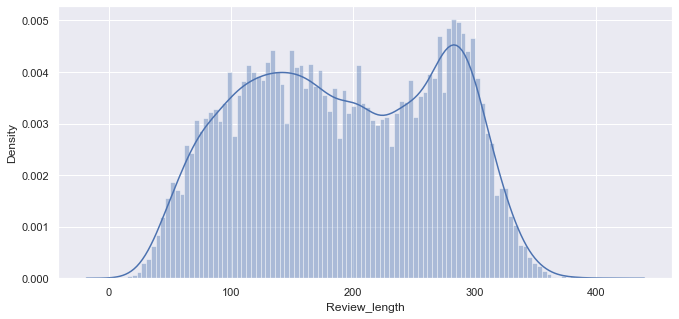

In [23]:
sns.set(rc={'figure.figsize':(11,5)})
sns.distplot(data['Review_length'] ,hist=True, bins=100)

In [24]:
df_zero = data[data['Recommended']==0]
df_one = data[data['Recommended']==1]

<AxesSubplot:ylabel='Density'>

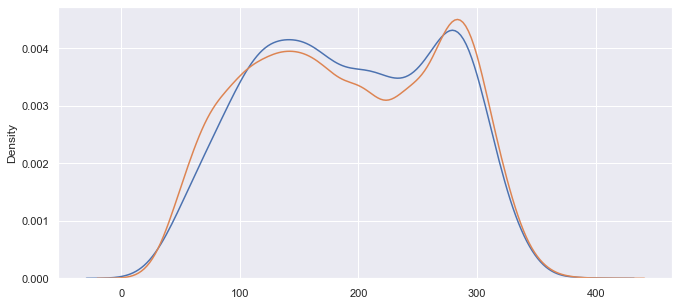

In [25]:
sns.distplot(df_zero[['Review_length']] ,hist=False)
sns.distplot(df_one[['Review_length']], hist=False)

In [26]:
data

Recommended  \
2      0             
3      1             
4      1             
5      0             
6      1             
...   ..             
23481  1             
23482  1             
23483  0             
23484  1             
23485  1             

                                                                                                                                                                                                                                                                                                                  Review  \
2      major design flaw high hop dress really want work initially order petite small usual size find outrageously small small fact could zip reorder petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sew directly zipper   
3      favorite buy love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment                                                                                                                                                                                                               
4      flatter shirt shirt flatter due adjustable front tie perfect length wear leggings sleeveless pair well cardigan love shirt                                                                                                                                                                                          
5      petite love tracy reese dress one petite feet tall usually wear brand dress pretty package lot dress skirt long full overwhelm small frame stranger alterations shorten narrow skirt would take away embellishment garment love color idea style work return dress                                                  
6      cagrcoal shimmer fun aded basket hte last mintue see would look like person store pick go teh darkler color pale hte color really gorgeous turn mathced everythiing try prefectly little baggy hte hte msallet size bummer petite decide jkeep though say matvehd everything ejans pant skirt waas try keep oops    
...                                                                                                                                                                                                                                                                                                                 ...    
23481  great dress many occasion happy snag dress great price easy slip flatter cut color combo                                                                                                                                                                                                                            
23482  wish make cotton remind maternity clothe soft stretchy shiny material cut flatter drape nicely find one button close front look awkward nice long sleeves maybe others                                                                                                                                              
23483  cute see fit well top see never would work glad able try store order online different fabric would great                                                                                                                                                                                                            
23484  cute dress perfect summer party buy dress wed summer cute unfortunately fit perfect medium fit waist perfectly way long big bust shoulder want spend money could get tailor felt like might worth side note dress deliver nordstrom tag find much cheaper look                                                      
23485  please make like one dress lovely platinum feminine fit perfectly easy wear comfy highly recommend                                                                                                                                                                 

In [27]:
data['Polarity'] = data['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
data.head(5)

Recommended  \
2  0             
3  1             
4  1             
5  0             
6  1             

                                                                                                                                                                                                                                                                                                              Review  \
2  major design flaw high hop dress really want work initially order petite small usual size find outrageously small small fact could zip reorder petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sew directly zipper   
3  favorite buy love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment                                                                                                                                                                                                               
4  flatter shirt shirt flatter due adjustable front tie perfect length wear leggings sleeveless pair well cardigan love shirt                                                                                                                                                                                          
5  petite love tracy reese dress one petite feet tall usually wear brand dress pretty package lot dress skirt long full overwhelm small frame stranger alterations shorten narrow skirt would take away embellishment garment love color idea style work return dress                                                  
6  cagrcoal shimmer fun aded basket hte last mintue see would look like person store pick go teh darkler color pale hte color really gorgeous turn mathced everythiing try prefectly little baggy hte hte msallet size bummer petite decide jkeep though say matvehd everything ejans pant skirt waas try keep oops    

   Review_length  Polarity  
2  305            0.062413  
3  101            0.500000  
4  122            0.458333  
5  258            0.106250  
6  304            0.120500

<AxesSubplot:ylabel='Frequency'>

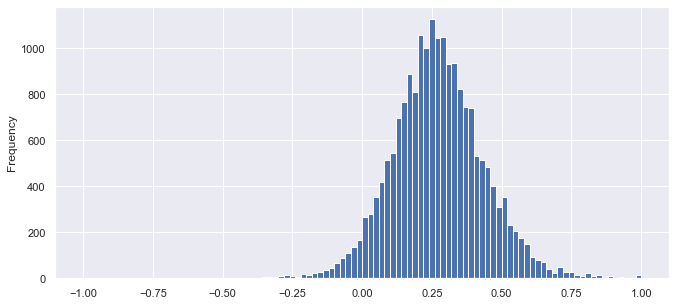

In [28]:
data['Polarity'].plot(kind='hist', bins=100)

In [29]:
pos_df = data[data.Recommended== 1]
neg_df = data[data.Recommended== 0]
pos_df.head(3)

Recommended  \
3  1             
4  1             
6  1             

                                                                                                                                                                                                                                                                                                             Review  \
3  favorite buy love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment                                                                                                                                                                                                              
4  flatter shirt shirt flatter due adjustable front tie perfect length wear leggings sleeveless pair well cardigan love shirt                                                                                                                                                                                         
6  cagrcoal shimmer fun aded basket hte last mintue see would look like person store pick go teh darkler color pale hte color really gorgeous turn mathced everythiing try prefectly little baggy hte hte msallet size bummer petite decide jkeep though say matvehd everything ejans pant skirt waas try keep oops   

   Review_length  Polarity  
3  101            0.500000  
4  122            0.458333  
6  304            0.120500

In [30]:

pos_words =[]
neg_words = []

for reviews in pos_df.Review:
    pos_words.append(reviews) 
pos_words = ' '.join(pos_words)
pos_words[:40]

for reviews in neg_df.Review:
    neg_words.append(reviews)
neg_words = ' '.join(neg_words)
neg_words[:400]


'major design flaw high hop dress really want work initially order petite small usual size find outrageously small small fact could zip reorder petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sew directly zipper petite love tracy reese dress one petite feet tall usually wear brand dress pretty package lot'

**Positive reviews**

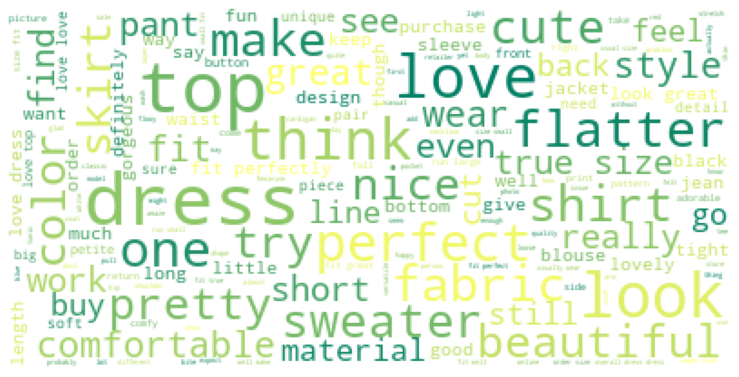

In [31]:

wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


**Negative Reviews**

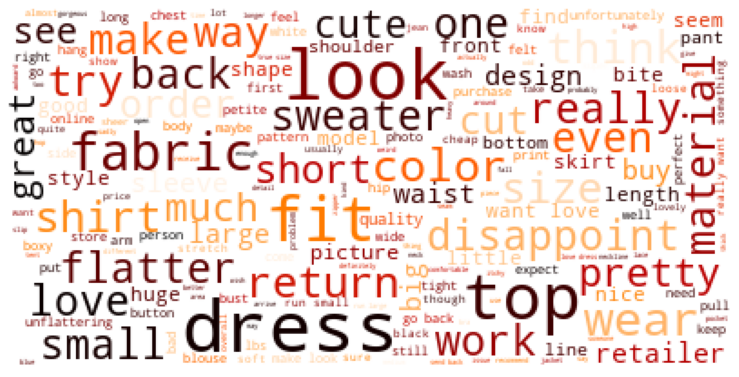

In [32]:

wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


**TF-IDF**

In [31]:
def text_vectorizing_process(sentence_string):
    return [word for word in sentence_string.split()]

In [32]:
bow_transformer = CountVectorizer(text_vectorizing_process)

In [33]:
bow_transformer.fit(data['Review'])

CountVectorizer(input=<function text_vectorizing_process at 0x7f9f64d683a0>)

In [34]:
print(data['Review'].iloc[3])

petite love tracy reese dress one petite feet tall usually wear brand dress pretty package lot dress skirt long full overwhelm small frame stranger alterations shorten narrow skirt would take away embellishment garment love color idea style work return dress


In [35]:
example = bow_transformer.transform([data['Review'].iloc[3]])
print(example)
#3507=Love
#4438=petit

  (0, 287)	1
  (0, 643)	1
  (0, 1143)	1
  (0, 1805)	1
  (0, 2788)	4
  (0, 2976)	1
  (0, 3363)	1
  (0, 3661)	1
  (0, 3728)	1
  (0, 3794)	1
  (0, 4467)	1
  (0, 5299)	1
  (0, 5349)	1
  (0, 5364)	2
  (0, 5996)	1
  (0, 6308)	1
  (0, 6487)	1
  (0, 6503)	1
  (0, 6737)	2
  (0, 7091)	1
  (0, 7461)	1
  (0, 7660)	1
  (0, 8215)	1
  (0, 8370)	2
  (0, 8463)	1
  (0, 8826)	1
  (0, 8910)	1
  (0, 9161)	1
  (0, 9167)	1
  (0, 9542)	1
  (0, 9966)	1
  (0, 10209)	1
  (0, 10426)	1
  (0, 10456)	1


In [36]:
Reviews = bow_transformer.transform(data['Review'])
Reviews

<19662x10598 sparse matrix of type '<class 'numpy.int64'>'
	with 531605 stored elements in Compressed Sparse Row format>

In [37]:
print('Shape of Sparse Matrix', Reviews.shape)
print('Amount of Non-Zero occurences:', Reviews.nnz)

Shape of Sparse Matrix (19662, 10598)
Amount of Non-Zero occurences: 531605


In [38]:
#3507=Love
#4438=petit

In [39]:
tfidf_transformer = TfidfTransformer().fit(Reviews)

tfidf_example = tfidf_transformer.transform(example)
print (tfidf_example)

  (0, 10456)	0.08204936868751286
  (0, 10426)	0.09679880775503956
  (0, 10209)	0.06323674866093393
  (0, 9966)	0.10753874610090543
  (0, 9542)	0.23586130040161962
  (0, 9167)	0.14401708526711374
  (0, 9161)	0.12271161665329432
  (0, 8910)	0.10648919830454301
  (0, 8826)	0.2852825349075419
  (0, 8463)	0.0862150405932958
  (0, 8370)	0.2266459560437742
  (0, 8215)	0.21305532347338554
  (0, 7660)	0.1117325116842686
  (0, 7461)	0.23586130040161962
  (0, 7091)	0.0995632219621529
  (0, 6737)	0.21439381499351018
  (0, 6503)	0.19183996998843067
  (0, 6487)	0.19028421912169383
  (0, 6308)	0.09159129928164828
  (0, 5996)	0.1826833595060911
  (0, 5364)	0.11754356255212482
  (0, 5349)	0.12508818448194095
  (0, 5299)	0.10242549928126345
  (0, 4467)	0.17673355049218722
  (0, 3794)	0.19490949860483786
  (0, 3728)	0.1429922721093606
  (0, 3661)	0.15269572387267116
  (0, 3363)	0.19999013294531479
  (0, 2976)	0.2545160012173723
  (0, 2788)	0.2708370150394741
  (0, 1805)	0.07083234968070565
  (0, 1143)	0.

In [40]:
[i for i in bow_transformer.vocabulary_.items() if i[1]==3507]

[('fleck', 3507)]

In [41]:
[i for i in bow_transformer.vocabulary_.items()][6:60:10]

[('really', 7386),
 ('outrageously', 6427),
 ('fit', 3452),
 ('sew', 8098),
 ('every', 3127),
 ('adjustable', 137)]

In [42]:
messages_tfidf = tfidf_transformer.transform(Reviews)
messages_tfidf.shape

(19662, 10598)

In [43]:
print(messages_tfidf[:1]) 
#tuple(index_num, word_num), tfidf_proba

  (0, 10587)	0.12040077091353324
  (0, 10584)	0.13160901649141335
  (0, 10426)	0.07241576347468301
  (0, 10157)	0.07857830013578217
  (0, 9964)	0.09913748400574918
  (0, 9498)	0.054094965614698044
  (0, 9424)	0.08841396346587588
  (0, 8565)	0.13522639295921207
  (0, 8463)	0.19349395304631511
  (0, 8339)	0.04841813595498365
  (0, 8098)	0.13078554613986162
  (0, 8094)	0.12349188836633238
  (0, 7566)	0.1656230764827148
  (0, 7386)	0.06673389465466993
  (0, 6737)	0.16038928740004743
  (0, 6442)	0.1009458908351883
  (0, 6427)	0.2296872963882238
  (0, 6369)	0.06210728905175813
  (0, 6101)	0.1015366869987845
  (0, 6074)	0.3752819563092681
  (0, 5634)	0.0808599230564106
  (0, 5479)	0.3440726274246005
  (0, 5092)	0.3081896005944688
  (0, 4635)	0.15293224339861541
  (0, 4507)	0.17203631371230024
  (0, 4336)	0.10963279599743905
  (0, 4251)	0.09290236146059228
  (0, 4094)	0.26695472664054093
  (0, 3502)	0.2751500022810849
  (0, 3452)	0.04366640733873424
  (0, 3425)	0.08097035383438599
  (0, 3264)	

In [44]:
messages_tfidf = messages_tfidf.toarray()
messages_tfidf = pd.DataFrame(messages_tfidf)
print(messages_tfidf.shape)
messages_tfidf.head()

(19662, 10598)


0    1    2    3    4    5    6    7    8    9  ...  10588  10589  10590  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0    0.0     
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0    0.0     
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0    0.0     
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0    0.0     
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0    0.0     

   10591  10592  10593  10594  10595  10596  10597  
0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    
1  0.0    0.0    0.0    0.0    0.0    0.0    0.0    
2  0.0    0.0    0.0    0.0    0.0    0.0    0.0    
3  0.0    0.0    0.0    0.0    0.0    0.0    0.0    
4  0.0    0.0    0.0    0.0    0.0    0.0    0.0    

[5 rows x 10598 columns]

In [45]:
df_all = pd.merge(data.drop(columns='Review'),messages_tfidf, 
                  left_index=True, right_index=True )
df_all.head()

Recommended  Review_length  Polarity    0    1    2    3    4    5    6  \
2  0            305            0.062413  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  1            101            0.500000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  1            122            0.458333  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  0            258            0.106250  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6  1            304            0.120500  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   ...  10588  10589  10590  10591  10592  10593  10594  10595  10596  10597  
2  ...  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
3  ...  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
4  ...  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
5  ...  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
6  ...  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    

[5 rows x 10601 columns]

In [46]:
X = df_all.drop('Recommended', axis=1)
y = df_all.Recommended

X.head()

Review_length  Polarity    0    1    2    3    4    5    6    7  ...  \
2  305            0.062413  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3  101            0.500000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4  122            0.458333  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
5  258            0.106250  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
6  304            0.120500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

   10588  10589  10590  10591  10592  10593  10594  10595  10596  10597  
2  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
3  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
4  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
5  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
6  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    

[5 rows x 10600 columns]

In [47]:
X_train, X_test, y_train, y_test = split(X,y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13169, 10600), (3293, 10600), (13169,), (3293,))

In [48]:
y_train.value_counts(normalize=True)

1    0.818589
0    0.181411
Name: Recommended, dtype: float64

In [49]:
y_test.value_counts(normalize=True)

1    0.818706
0    0.181294
Name: Recommended, dtype: float64

In [50]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
pd.DataFrame(X_train_scaled,columns= X_train.columns).describe()

Review_length      Polarity             0             1             2  \
count  13169.000000   13169.000000  13169.000000  13169.000000  13169.000000   
mean   0.475148       0.635283      0.000076      0.000205      0.000076       
std    0.215903       0.082267      0.008714      0.012212      0.008714       
min    0.000000       0.000000      0.000000      0.000000      0.000000       
25%    0.295699       0.582738      0.000000      0.000000      0.000000       
50%    0.470430       0.633333      0.000000      0.000000      0.000000       
75%    0.672043       0.685408      0.000000      0.000000      0.000000       
max    1.000000       1.000000      1.000000      1.000000      1.000000       

                  3             4             5             6             7  \
count  13169.000000  13169.000000  13169.000000  13169.000000  13169.000000   
mean   0.000209      0.000286      0.000371      0.000234      0.000320       
std    0.012418      0.013905      0.019057      0.012592      0.015249       
min    0.000000      0.000000      0.000000      0.000000      0.000000       
25%    0.000000      0.000000      0.000000      0.000000      0.000000       
50%    0.000000      0.000000      0.000000      0.000000      0.000000       
75%    0.000000      0.000000      0.000000      0.000000      0.000000       
max    1.000000      1.000000      1.000000      1.000000      1.000000       

       ...    10588         10589         10590         10591         10592  \
count  ...  13169.0  13169.000000  13169.000000  13169.000000  13169.000000   
mean   ...  0.0      0.000076      0.000076      0.000076      0.000147       
std    ...  0.0      0.008714      0.008714      0.008714      0.011901       
min    ...  0.0      0.000000      0.000000      0.000000      0.000000       
25%    ...  0.0      0.000000      0.000000      0.000000      0.000000       
50%    ...  0.0      0.000000      0.000000      0.000000      0.000000       
75%    ...  0.0      0.000000      0.000000      0.000000      0.000000       
max    ...  0.0      1.000000      1.000000      1.000000      1.000000       

              10593         10594    10595         10596         10597  
count  13169.000000  13169.000000  13169.0  13169.000000  13169.000000  
mean   0.000076      0.000306      0.0      0.000076      0.000076      
std    0.008714      0.015840      0.0      0.008714      0.008714      
min    0.000000      0.000000      0.0      0.000000      0.000000      
25%    0.000000      0.000000      0.0      0.000000      0.000000      
50%    0.000000      0.000000      0.0      0.000000      0.000000      
75%    0.000000      0.000000      0.0      0.000000      0.000000      
max    1.000000      1.000000      0.0      1.000000      1.000000      

[8 rows x 10600 columns]

**Data Visualization (PCA)**

In [52]:
pca_transformer = PCA(n_components=2).fit(X_train_scaled)
X_train_scaled_pca = pca_transformer.transform(X_train_scaled)
X_test_scaled_pca = pca_transformer.transform(X_test_scaled)
X_train_scaled_pca[:1]

array([[-0.03576734, -0.09783022]])

<AxesSubplot:>

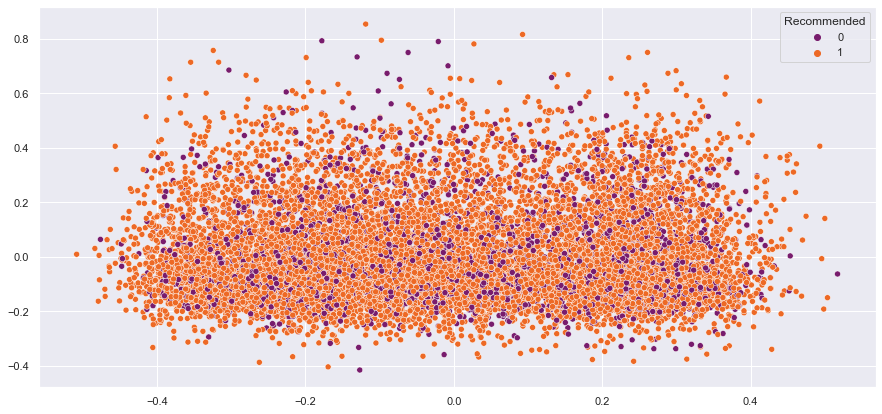

In [53]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=X_train_scaled_pca[:, 0], 
                y=X_train_scaled_pca[:, 1], 
                hue=y_train, 
                sizes=100,
                palette="inferno") 

In [54]:
X_train_scaled = scipy.sparse.csr_matrix(X_train_scaled)
X_test_scaled = scipy.sparse.csr_matrix(X_test_scaled)

X_train = scipy.sparse.csr_matrix(X_train.values)
X_test = scipy.sparse.csr_matrix(X_test.values)
X_test

<3293x10600 sparse matrix of type '<class 'numpy.float64'>'
	with 95466 stored elements in Compressed Sparse Row format>

In [55]:
def report(y_true, y_pred, labels):
    cm = pd.DataFrame(confusion_matrix(y_true=y_true, y_pred=y_pred), 
                                        index=labels, columns=labels)
    rep = classification_report(y_true=y_true, y_pred=y_pred)
    return (f'Confusion Matrix:\n{cm}\n\nClassification Report:\n{rep}')

**Support Vector Machine:**

In [56]:
svc_model = SVC(C=1.0, 
             kernel='linear',
             class_weight='balanced', 
             probability=True,
             random_state=111)
svc_model.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', kernel='linear', probability=True,
    random_state=111)

In [57]:
test_predictions = svc_model.predict(X_test_scaled)
print(report(y_test, test_predictions, svc_model.classes_ ))

Confusion Matrix:
     0     1
0  296  301 
1  694  2002

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.50      0.37       597
           1       0.87      0.74      0.80      2696

    accuracy                           0.70      3293
   macro avg       0.58      0.62      0.59      3293
weighted avg       0.77      0.70      0.72      3293



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

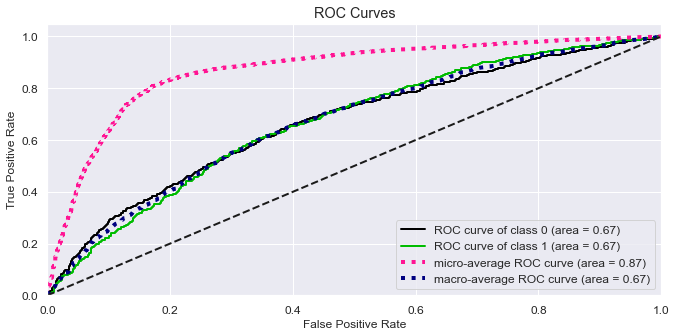

In [58]:
skplt.metrics.plot_roc(y_test, svc_model.predict_proba(X_test_scaled)) 

**Logistic Regression:**

In [59]:
lr_model = LogisticRegression(class_weight='balanced', 
                              random_state=111, 
                              solver='lbfgs',
                              C=1.0)

gs_lr_model = GridSearchCV(lr_model, 
                           param_grid={'C': [0.01, 0.1, 0.5, 1.0, 5.0]}, 
                           cv=5, 
                           scoring='roc_auc')

gs_lr_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=111),
             param_grid={'C': [0.01, 0.1, 0.5, 1.0, 5.0]}, scoring='roc_auc')

In [60]:
gs_lr_model.best_params_

{'C': 0.01}

In [61]:
test_predictions = gs_lr_model.predict(X_test_scaled)
print(report(y_test, test_predictions, gs_lr_model.classes_ ))

Confusion Matrix:
     0     1
0  368  229 
1  800  1896

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.62      0.42       597
           1       0.89      0.70      0.79      2696

    accuracy                           0.69      3293
   macro avg       0.60      0.66      0.60      3293
weighted avg       0.79      0.69      0.72      3293



<AxesSubplot:title={'center':'ROC Curves - Logistic Regression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

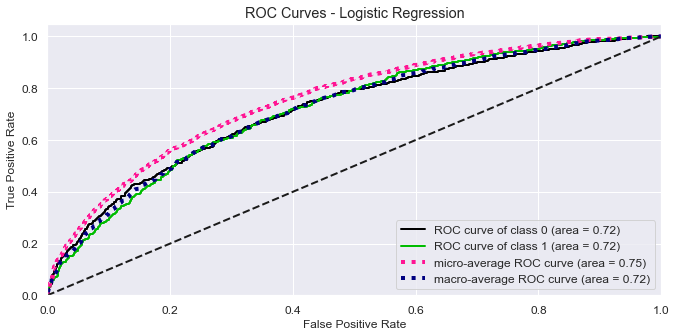

In [62]:
skplt.metrics.plot_roc(y_test, gs_lr_model.predict_proba(X_test_scaled),
                      title='ROC Curves - Logistic Regression') 

**Random Forest:**

In [63]:
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=5, 
                                  class_weight='balanced', random_state=3)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=1000,
                       random_state=3)

In [64]:
test_predictions = rf_model.predict(X_test)
print(report(y_test, test_predictions, rf_model.classes_ ))

Confusion Matrix:
     0     1
0  310  287 
1  539  2157

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.52      0.43       597
           1       0.88      0.80      0.84      2696

    accuracy                           0.75      3293
   macro avg       0.62      0.66      0.63      3293
weighted avg       0.79      0.75      0.76      3293



<AxesSubplot:title={'center':'ROC Curves - Random Forest'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

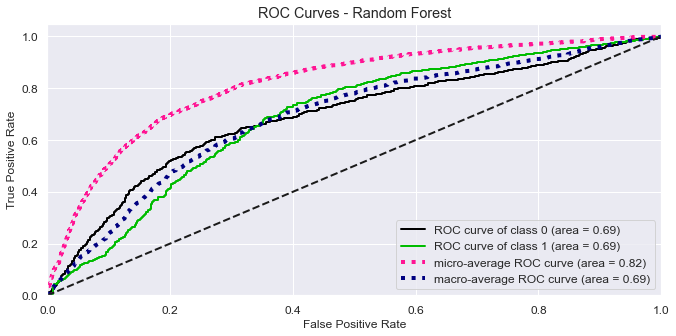

In [65]:
skplt.metrics.plot_roc(y_test, rf_model.predict_proba(X_test), 
                       title='ROC Curves - Random Forest') 

**Random Forest - Threshold:**

In [66]:
probs = rf_model.predict_proba(X_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, probs[:,1])

Text(0, 0.5, 'TPR')

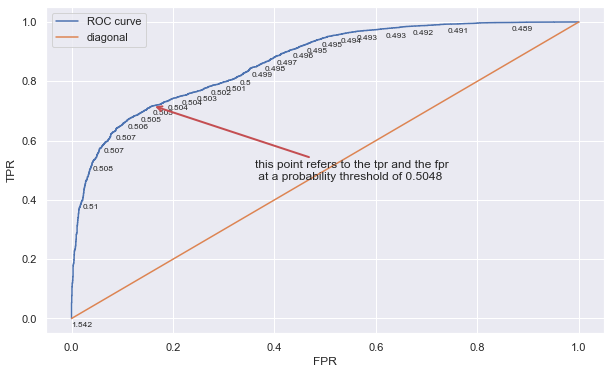

In [67]:
#Train
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, '-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
for x, y, txt in zip(fpr[::100], tpr[::100], thresholds[::100]):
    plt.annotate(np.round(txt,3), (x, y-0.03), fontsize='x-small')
rnd_idx = 700
plt.annotate('this point refers to the tpr and the fpr\n at a probability threshold of {}'\
             .format(np.round(thresholds[rnd_idx], 4)), 
             xy=(fpr[rnd_idx], tpr[rnd_idx]), xytext=(fpr[rnd_idx]+0.2, tpr[rnd_idx]-0.25),
             arrowprops=dict(facecolor='black', lw=2, arrowstyle='->',color='r'),)
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

In [68]:
probs = rf_model.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs[:,1])

Text(0, 0.5, 'TPR')

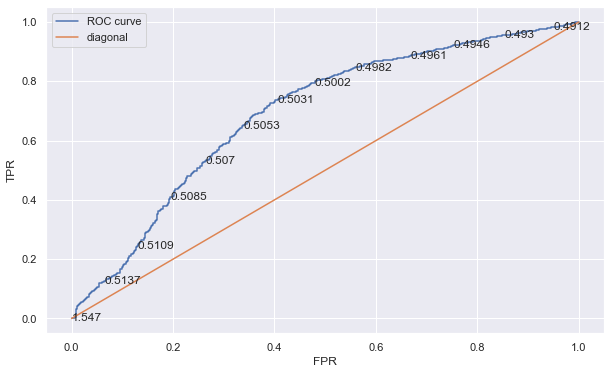

In [69]:
#Test
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, '-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
for x, y, txt in zip(fpr[::70], tpr[::70], thresholds[::70]):
    plt.annotate(np.round(txt,4), (x, y-0.01))

plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

In [70]:
data.head()

Recommended  \
2  0             
3  1             
4  1             
5  0             
6  1             

                                                                                                                                                                                                                                                                                                              Review  \
2  major design flaw high hop dress really want work initially order petite small usual size find outrageously small small fact could zip reorder petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sew directly zipper   
3  favorite buy love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment                                                                                                                                                                                                               
4  flatter shirt shirt flatter due adjustable front tie perfect length wear leggings sleeveless pair well cardigan love shirt                                                                                                                                                                                          
5  petite love tracy reese dress one petite feet tall usually wear brand dress pretty package lot dress skirt long full overwhelm small frame stranger alterations shorten narrow skirt would take away embellishment garment love color idea style work return dress                                                  
6  cagrcoal shimmer fun aded basket hte last mintue see would look like person store pick go teh darkler color pale hte color really gorgeous turn mathced everythiing try prefectly little baggy hte hte msallet size bummer petite decide jkeep though say matvehd everything ejans pant skirt waas try keep oops    

   Review_length  Polarity  
2  305            0.062413  
3  101            0.500000  
4  122            0.458333  
5  258            0.106250  
6  304            0.120500

**LDA Model**

In [71]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = data_LDA.Review.sample(n=10000, random_state=0).values

print('Headline before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Headline after vectorization: \n{}'.format(small_document_term_matrix[123]))

Headline before vectorization: fun winter buy stretchy skinny cord usual size waist low waist hip butt comfortable long enough frame hope shrink flower pattern pair store flower run inside outside legs dark part run middle wish like picture model print run right front back legs dark part inner outer thigh
Headline after vectorization: 
  (0, 6052)	1
  (0, 3858)	1
  (0, 5596)	1
  (0, 6416)	1
  (0, 3913)	1
  (0, 1342)	1
  (0, 3791)	1
  (0, 4777)	1
  (0, 2727)	1
  (0, 7259)	1
  (0, 7373)	2
  (0, 5676)	3
  (0, 933)	1
  (0, 4902)	1
  (0, 6069)	1
  (0, 5155)	1
  (0, 4702)	1
  (0, 4239)	1
  (0, 1702)	2
  (0, 7546)	1
  (0, 2678)	1
  (0, 3411)	1
  (0, 6459)	1
  (0, 3170)	1
  (0, 5985)	1
  (0, 7540)	1
  (0, 1503)	1
  (0, 3745)	2
  (0, 2600)	2
  (0, 3121)	1
  (0, 923)	1
  (0, 4641)	1
  (0, 4151)	1
  (0, 3399)	1
  (0, 4631)	1
  (0, 6809)	1


In [72]:
n_topics = 10

In [73]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [74]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [75]:
from collections import Counter
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [76]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [77]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  dress itchy super lightweight creative young coat appropriate love neckline
Topic 2:  love look color like wear dress fit shirt great fabric
Topic 3:  dress retailer beautiful color person blouse picture love yellow sweater
Topic 4:  button coat wear break jacket miss beautiful quality fabric dress
Topic 5:  dress look like fabric make love beautiful flatter wear fit
Topic 6:  love wear dress great fit color perfect look size comfortable
Topic 7:  wear look expensive bite pattern like love femine regular person
Topic 8:  bra add love wear great look strap vest color stylish
Topic 9:  size suit smell comfortable fit mara hoffman perfect bath basketweave
Topic 10:  size fit dress look love like wear small order color


In [78]:
from gensim.models.coherencemodel import CoherenceModel

**LSA Model**

In [79]:
data_LSA 

Review
2      major design flaw high hop dress really want work initially order petite small usual size find outrageously small small fact could zip reorder petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sew directly zipper
3      favorite buy love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment                                                                                                                                                                                                            
4      flatter shirt shirt flatter due adjustable front tie perfect length wear leggings sleeveless pair well cardigan love shirt                                                                                                                                                                                       
5      petite love tracy reese dress one petite feet tall usually wear brand dress pretty package lot dress skirt long full overwhelm small frame stranger alterations shorten narrow skirt would take away embellishment garment love color idea style work return dress                                               
6      cagrcoal shimmer fun aded basket hte last mintue see would look like person store pick go teh darkler color pale hte color really gorgeous turn mathced everythiing try prefectly little baggy hte hte msallet size bummer petite decide jkeep though say matvehd everything ejans pant skirt waas try keep oops 
...                                                                                                                                                                                                                                                                                                                 ... 
23481  great dress many occasion happy snag dress great price easy slip flatter cut color combo                                                                                                                                                                                                                         
23482  wish make cotton remind maternity clothe soft stretchy shiny material cut flatter drape nicely find one button close front look awkward nice long sleeves maybe others                                                                                                                                           
23483  cute see fit well top see never would work glad able try store order online different fabric would great                                                                                                                                                                                                         
23484  cute dress perfect summer party buy dress wed summer cute unfortunately fit perfect medium fit waist perfectly way long big bust shoulder want spend money could get tailor felt like might worth side note dress deliver nordstrom tag find much cheaper look                                                   
23485  please make like one dress lovely platinum feminine fit perfectly easy wear comfy highly recommend                                                                                                                                                                                                               

[19662 rows x 1 columns]

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = data_LSA.Review.sample(n=5000, random_state=42).values

print('Headline before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Headline after vectorization: \n{}'.format(small_document_term_matrix[123]))

Headline before vectorization: cute sucker bow decide try one order go petite without try regular size hindsight order tit fit nicely petite keep length model right hip colros hte bow well represent picture light pink light mustard yellow navy stil lthink neutral ebough mix color warm cold palette love hte button detial back order
Headline after vectorization: 
  (0, 1160)	1
  (0, 3265)	3
  (0, 4288)	1
  (0, 2758)	1
  (0, 2651)	1
  (0, 4995)	2
  (0, 3971)	1
  (0, 3096)	1
  (0, 3479)	1
  (0, 3007)	1
  (0, 1775)	1
  (0, 900)	1
  (0, 3454)	2
  (0, 891)	1
  (0, 3868)	1
  (0, 3501)	1
  (0, 3135)	1
  (0, 5284)	1
  (0, 1215)	1
  (0, 2670)	2
  (0, 2998)	1
  (0, 638)	1
  (0, 3126)	1
  (0, 2212)	1
  (0, 4646)	1
  (0, 527)	2
  (0, 2210)	1
  (0, 4900)	1
  (0, 914)	1
  (0, 2276)	2
  (0, 3906)	1
  (0, 3077)	1
  (0, 5472)	1
  (0, 4543)	1
  (0, 2774)	1
  (0, 1496)	1
  (0, 3348)	1
  (0, 1306)	1


In [81]:
n_topics = 10

In [82]:
from sklearn.decomposition import TruncatedSVD
lsa_model1 = TruncatedSVD(2)
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [83]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [84]:
from collections import Counter
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [85]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [86]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  dress love fit size wear look like great color fabric
Topic 2:  dress beautiful love wear perfect great flatter casual fabric make
Topic 3:  size fit order small run store petite true dress length
Topic 4:  look like make fabric cute picture shape really good model
Topic 5:  fit great like color perfect flatter nice soft perfectly cute
Topic 6:  wear great comfortable cute sweater buy fit shirt jeans flatter
Topic 7:  great look soft size love pant color jeans fit buy
Topic 8:  color fabric beautiful soft great nice pretty buy shirt really
Topic 9:  small run large medium cute order little shirt great size
Topic 10:  like cute really shirt super fabric white feel great love


**NMV Model**

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = data_NMF.Review.sample(n=5000, random_state=42).values

print('Headline before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Headline after vectorization: \n{}'.format(small_document_term_matrix[123]))

Headline before vectorization: cute sucker bow decide try one order go petite without try regular size hindsight order tit fit nicely petite keep length model right hip colros hte bow well represent picture light pink light mustard yellow navy stil lthink neutral ebough mix color warm cold palette love hte button detial back order
Headline after vectorization: 
  (0, 1160)	1
  (0, 3265)	3
  (0, 4288)	1
  (0, 2758)	1
  (0, 2651)	1
  (0, 4995)	2
  (0, 3971)	1
  (0, 3096)	1
  (0, 3479)	1
  (0, 3007)	1
  (0, 1775)	1
  (0, 900)	1
  (0, 3454)	2
  (0, 891)	1
  (0, 3868)	1
  (0, 3501)	1
  (0, 3135)	1
  (0, 5284)	1
  (0, 1215)	1
  (0, 2670)	2
  (0, 2998)	1
  (0, 638)	1
  (0, 3126)	1
  (0, 2212)	1
  (0, 4646)	1
  (0, 527)	2
  (0, 2210)	1
  (0, 4900)	1
  (0, 914)	1
  (0, 2276)	2
  (0, 3906)	1
  (0, 3077)	1
  (0, 5472)	1
  (0, 4543)	1
  (0, 2774)	1
  (0, 1496)	1
  (0, 3348)	1
  (0, 1306)	1


In [88]:
n_topics = 10

In [89]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [90]:
from sklearn.decomposition import TruncatedSVD
nmf_model1 = TruncatedSVD(2)
nmf_model1 = TruncatedSVD(n_components=n_topics)
nmf_topic_matrix = nmf_model1.fit_transform(small_document_term_matrix)

In [91]:
from collections import Counter
nmf_keys = get_keys(nmf_topic_matrix)
nmf_categories, nmf_counts = keys_to_counts(nmf_keys)

In [92]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [93]:
top_n_words_nmf = get_top_n_words(10, nmf_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_nmf)):
    print("Topic {}: ".format(i+1), top_n_words_nmf[i])

Topic 1:  dress love fit size wear look like great color fabric
Topic 2:  dress beautiful love wear perfect great flatter casual fabric make
Topic 3:  size fit order small run store petite true medium retailer
Topic 4:  look like make fabric cute picture shape really model good
Topic 5:  fit great like color perfect flatter nice soft cute perfectly
Topic 6:  wear great cute comfortable sweater buy fit shirt jeans flatter
Topic 7:  great look soft pant size love color jeans fit buy
Topic 8:  color fabric beautiful soft great nice pretty shirt like buy
Topic 9:  small run large cute medium shirt order little big wear
Topic 10:  like cute really feel great shirt fabric super love white
